Import Library
- Manipulasi data (pandas, numpy)
- Visualisasi (matplotlib, seaborn)
- Machine learning (sklearn)
- Evaluasi model dan preprocessing

In [1]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
import joblib
import pickle

Memuat dataset Telco Customer Churn dari file CSV.
Dataset berisi 7043 records dengan 21 kolom (20 fitur + 1 target)

In [2]:
#Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

**EXPLORATORY DATA ANALYSIS (EDA)**

In [4]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df.head(): Menampilkan customerID, gender, SeniorCitizen, Partner, dst

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df.info():

- int64: 3 kolom (SeniorCitizen, tenure, MonthlyCharges?)
- float64: 1 kolom (MonthlyCharges?)
- object: 17 kolom (categorical)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


df.describe():

- tenure: mean ~ 32 bulan, range 0-72
- MonthlyCharges: mean ~ $$64, range = $18-$118
- TotalCharges: Issue! (object type, should be numeric)

Dari eksplorasi awal, Bisa di lihat dataset punya mix data numerik dan kategorikal. Ada 3 kolom numerik utama: tenure, MonthlyCharges, dan TotalCharges. Yang menarik, TotalCharges tipe-nya object padahal seharusnya numeric - ini akan di handle di preprocessing

**IDENTIFIKASI MISSING VALUES**

Missing values perlu ditangani sebelum modeling

In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
#persentase missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df)

              Column  Missing_Percentage
0         customerID                 0.0
1             gender                 0.0
2      SeniorCitizen                 0.0
3            Partner                 0.0
4         Dependents                 0.0
5             tenure                 0.0
6       PhoneService                 0.0
7      MultipleLines                 0.0
8    InternetService                 0.0
9     OnlineSecurity                 0.0
10      OnlineBackup                 0.0
11  DeviceProtection                 0.0
12       TechSupport                 0.0
13       StreamingTV                 0.0
14   StreamingMovies                 0.0
15          Contract                 0.0
16  PaperlessBilling                 0.0
17     PaymentMethod                 0.0
18    MonthlyCharges                 0.0
19      TotalCharges                 0.0
20             Churn                 0.0


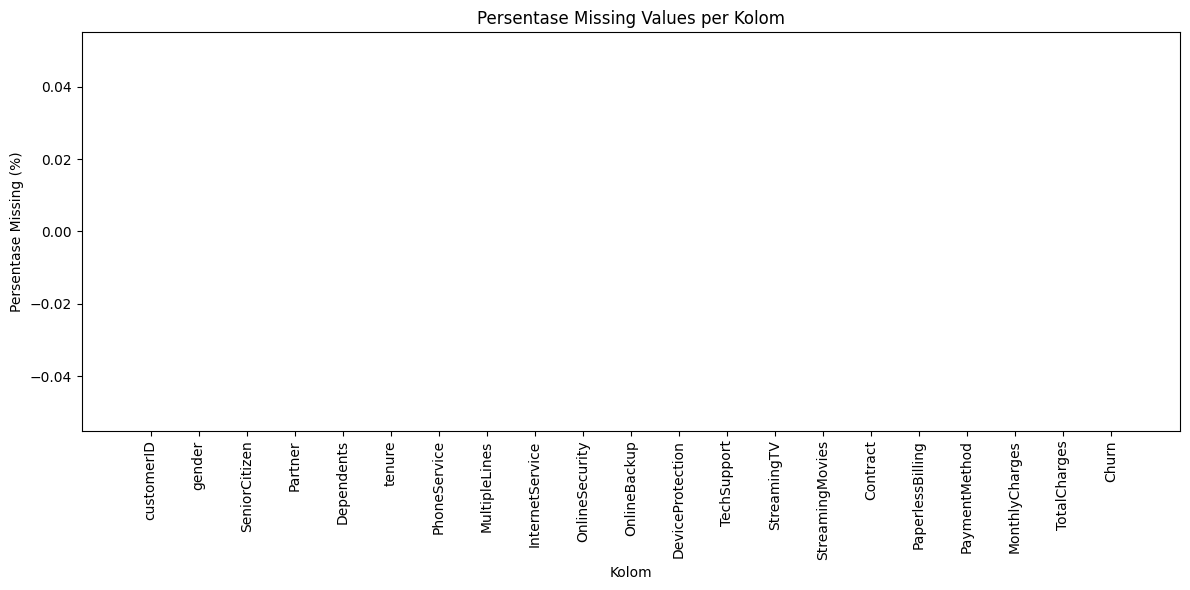

Total kolom dengan missing values: 0


In [9]:

#Visualisasi missing values
plt.figure(figsize=(12, 6))
plt.bar(missing_df['Column'], missing_df['Missing_Percentage'], color='coral')
plt.xticks(rotation=90)
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing (%)')
plt.title('Persentase Missing Values per Kolom')
plt.tight_layout()
plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total kolom dengan missing values: {(missing_percentage > 0).sum()}")

**VISUALISASI DISTRIBUSI TARGET**

- Visualisasi distribusi variabel target (Churn: Yes/No)
- Penting untuk mengecek keseimbangan kelas (class imbalance)
- Ketidakseimbangan kelas dapat mempengaruhi performa model

In [10]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Distribusi Churn:")
print(churn_counts)
print("Persentase:")
print(churn_percentage)

Distribusi Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Persentase:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


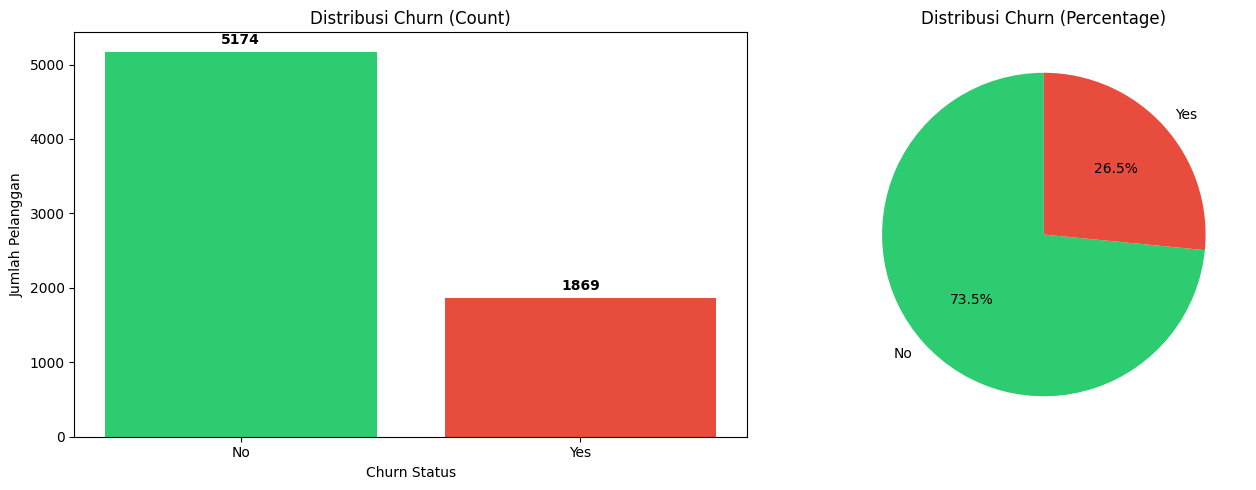

In [11]:
#Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Count plot
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].set_title('Distribusi Churn (Count)')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

#Pie chart
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Distribusi Churn (Percentage)')

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**ANALISIS KORELASI**

Membuat heatmap korelasi untuk fitur numerik
Korelasi menunjukkan hubungan linear antar variabel:
- Nilai mendekati +1: korelasi positif kuat
- Nilai mendekati -1: korelasi negatif kuat
- Nilai mendekati 0: tidak ada korelasi linear

Kolom numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


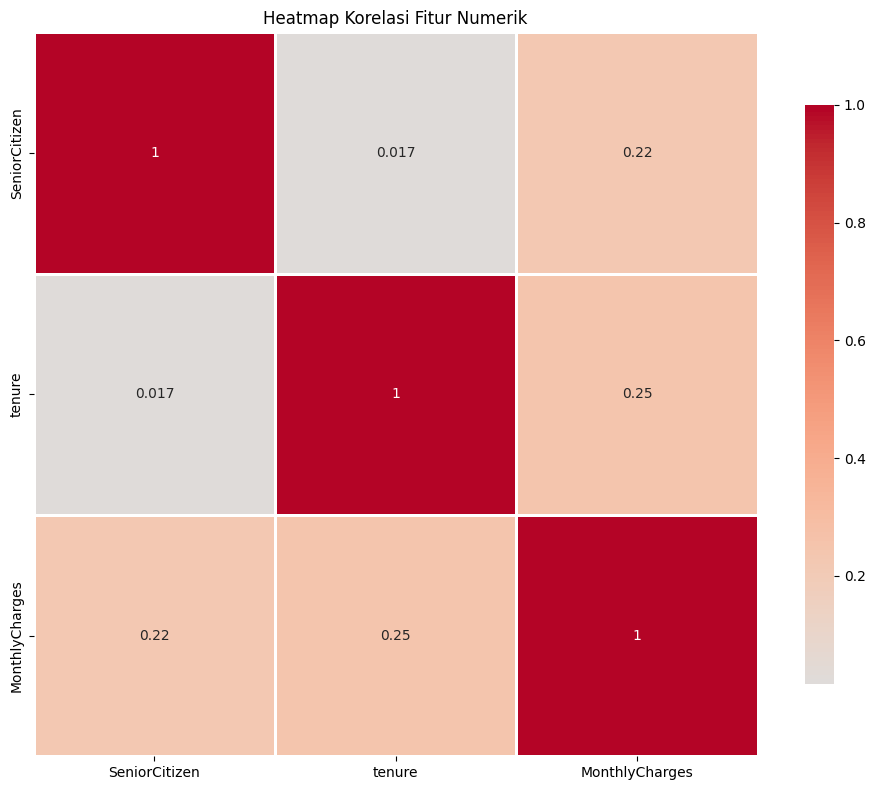

Korelasi dengan Churn:
Churn_numeric     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn_numeric, dtype: float64


In [12]:
#Identifikasi kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Kolom numerik: {numeric_cols}")

#Mengitung korelasi
correlation_matrix = df[numeric_cols].corr()

#Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

#Menampilkan korelasi dengan target (jika target numerik)
if 'Churn' in df.columns:
    #Convert Churn to numeric untuk analisis
    df_temp = df.copy()
    df_temp['Churn_numeric'] = df_temp['Churn'].map({'No': 0, 'Yes': 1})

    if 'Churn_numeric' in df_temp.columns:
        churn_corr = df_temp[numeric_cols + ['Churn_numeric']].corr()['Churn_numeric'].sort_values(ascending=False)
        print("Korelasi dengan Churn:")
        print(churn_corr)

Ini membantu mengidentifikasi:
- Fitur yang berkorelasi tinggi dengan target
- Multikolinearitas antar fitur

**DIRECT MODELLING**

Model dilatih langsung tanpa preprocessing dan tanpa tuning dengan
Tujuan: Mendapatkan baseline performance untuk perbandingan

Model yang digunakan:
1. Logistic Regression (Konvensional)
2. Random Forest (Ensemble Bagging)
3. Voting Classifier (Ensemble Voting: Logistic + SVM + KNN)

Mempersiapkan data untuk modeling:
1. Memisahkan fitur (X) dan target (y)
2. Handling kolom non-numerik dengan encoding sederhana
3. Split data menjadi train (80%) dan test (20%)

In [13]:
#Persiapan Data

#Copy dataframe untuk direct modeling
df_direct = df.copy()

#Convert TotalCharges ke numeric (handle space/empty string)
df_direct['TotalCharges'] = pd.to_numeric(df_direct['TotalCharges'], errors='coerce')
df_direct['TotalCharges'].fillna(df_direct['TotalCharges'].median(), inplace=True)

#Memisahkan fitur dan target
X_direct = df_direct.drop(['Churn', 'customerID'], axis=1)
y_direct = df_direct['Churn']

#Encoding manual untuk kolom kategorikal
label_encoders = {}
for col in X_direct.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_direct[col] = le.fit_transform(X_direct[col].astype(str))
    label_encoders[col] = le

#Train-test split
X_train_direct, X_test_direct, y_train_direct, y_test_direct = train_test_split(
    X_direct, y_direct, test_size=0.2, random_state=42, stratify=y_direct
)

print(f"Data training: {X_train_direct.shape}")
print(f"Data testing: {X_test_direct.shape}")

Data training: (5634, 19)
Data testing: (1409, 19)


Mempersiapkan data untuk modeling:
1. Memisahkan fitur (X) dan target (y)
2. Handling kolom non-numerik dengan encoding sederhana
3. Split data menjadi train (80%) dan test (20%)

In [14]:
#Inisialisasi Model

#Model 1: Logistic Regression (Konvensional)
model_lr_direct = LogisticRegression(random_state=42, max_iter=1000)

#Model 2: Random Forest (Ensemble Bagging)
model_rf_direct = RandomForestClassifier(random_state=42, n_estimators=100)

#Model 3: Voting Classifier (Ensemble Voting)
model_voting_direct = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('svm', SVC(random_state=42, probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

#Dictionary untuk menyimpan model
models_direct = {
    'Logistic Regression': model_lr_direct,
    'Random Forest': model_rf_direct,
    'Voting Classifier': model_voting_direct
}

Membuat 3 model yang mewakili kategori berbeda:
1. Logistic Regression - Model konvensional linear
2. Random Forest - Ensemble bagging dengan decision trees
3. Voting Classifier - Ensemble voting gabungan 3 model


Model: Logistic Regression
Training model...
Accuracy:  0.7991
Precision: 0.6409
Recall:    0.5535
F1-Score:  0.5940
Confusion Matrix:
[[919 116]
 [167 207]]


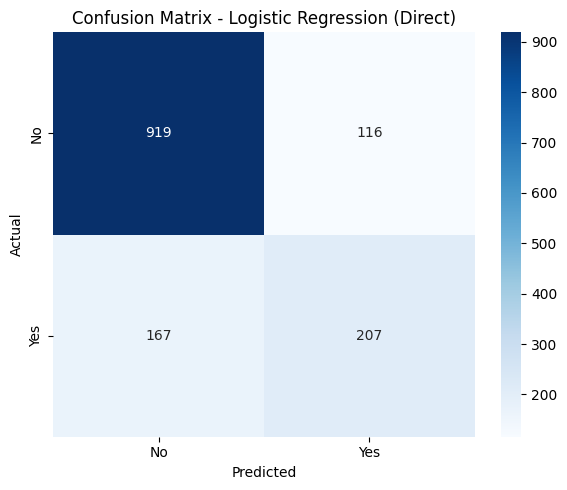


Model: Random Forest
Training model...
Accuracy:  0.7921
Precision: 0.6373
Recall:    0.5027
F1-Score:  0.5620
Confusion Matrix:
[[928 107]
 [186 188]]


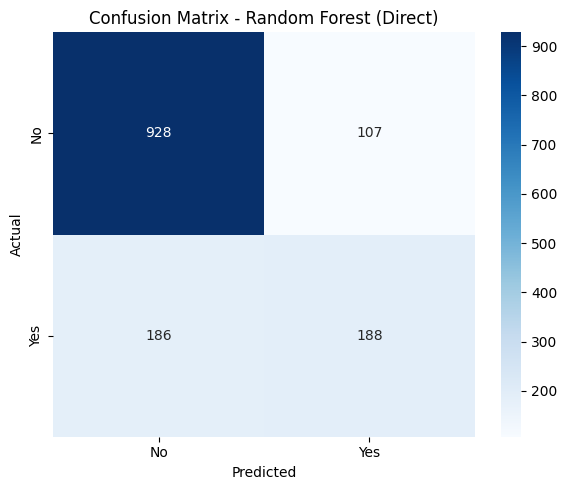


Model: Voting Classifier
Training model...
Accuracy:  0.7963
Precision: 0.6761
Recall:    0.4465
F1-Score:  0.5378
Confusion Matrix:
[[955  80]
 [207 167]]


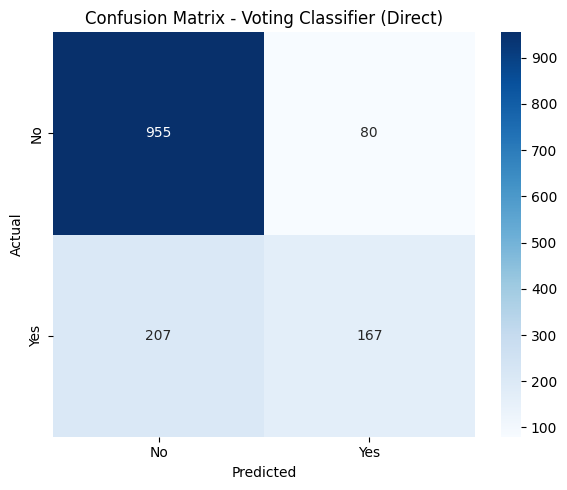


SUMMARY HASIL DIRECT MODELING
                     accuracy precision    recall  f1_score
Logistic Regression  0.799148  0.640867  0.553476  0.593974
Random Forest        0.792051  0.637288  0.502674  0.562033
Voting Classifier    0.796309  0.676113  0.446524  0.537842


In [15]:
#Training dan Evaluasi

results_direct = {}

for name, model in models_direct.items():
    print(f"\n{'=' * 60}")
    print(f"Model: {name}")
    print('=' * 60)

    #Training
    print("Training model...")
    model.fit(X_train_direct, y_train_direct)

    #Prediksi
    y_pred = model.predict(X_test_direct)

    #Evaluasi
    accuracy = accuracy_score(y_test_direct, y_pred)
    precision = precision_score(y_test_direct, y_pred, pos_label='Yes')
    recall = recall_score(y_test_direct, y_pred, pos_label='Yes')
    f1 = f1_score(y_test_direct, y_pred, pos_label='Yes')
    cm = confusion_matrix(y_test_direct, y_pred)

    #Simpan hasil
    results_direct[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    #Print hasil
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    #Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {name} (Direct)')
    plt.tight_layout()
    plt.savefig(f'cm_direct_{name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

#Summary hasil
print("\n" + "=" * 80)
print("SUMMARY HASIL DIRECT MODELING")
print("=" * 80)
summary_df_direct = pd.DataFrame(results_direct).T[['accuracy', 'precision', 'recall', 'f1_score']]
print(summary_df_direct)

Melatih setiap model dan mengevaluasi performanya,
Metrik evaluasi:
- Accuracy: Persentase prediksi yang benar
- Precision: Dari yang diprediksi churn, berapa yang benar churn
- Recall: Dari yang sebenarnya churn, berapa yang terdeteksi
- F1-Score: Harmonic mean dari precision dan recall
- Confusion Matrix: Matriks TP, TN, FP, FN

**MODELLING DENGAN PREPROCESSING**

Data dibersihkan dan diproses sebelum training,
Preprocessing meliputi:
- Handling missing values
- Encoding kategorikal
- Feature scaling
- Handling outliers (jika diperlukan)

In [16]:
#Copy dataframe
df_prep = df.copy()

In [17]:
#Preprocessing Data

#1. Handle Missing Values
print("1.Handling Missing Values...")
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
df_prep['TotalCharges'].fillna(df_prep['TotalCharges'].median(), inplace=True)
print(f"Missing values di TotalCharges: {df_prep['TotalCharges'].isnull().sum()}")

#2. Remove Duplikasi
print("2.Checking Duplikasi...")
duplicates = df_prep.duplicated().sum()
print(f"Jumlah duplikasi: {duplicates}")
if duplicates > 0:
    df_prep.drop_duplicates(inplace=True)
    print(f"Duplikasi telah dihapus. Shape sekarang: {df_prep.shape}")

#3. Handle Outliers (IQR method untuk fitur numerik)
print("3.Handling Outliers...")
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_features:
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df_prep[col] < lower_bound) | (df_prep[col] > upper_bound)).sum()
    print(f"   {col}: {outliers_count} outliers")

    #Cap outliers (winsorization)
    df_prep[col] = df_prep[col].clip(lower=lower_bound, upper=upper_bound)

#4. Pisahkan fitur dan target
X_prep = df_prep.drop(['Churn', 'customerID'], axis=1)
y_prep = df_prep['Churn']

#5. Identifikasi kolom kategorikal dan numerik
categorical_cols = X_prep.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_prep.select_dtypes(include=[np.number]).columns.tolist()

print(f"4.Feature Engineering...")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numerical_cols)}")

#6. One-Hot Encoding untuk kategorikal
print("5.Encoding Categorical Features...")
X_prep_encoded = pd.get_dummies(X_prep, columns=categorical_cols, drop_first=True)
print(f"Shape setelah encoding: {X_prep_encoded.shape}")

#7. Train-test split
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(
    X_prep_encoded, y_prep, test_size=0.2, random_state=42, stratify=y_prep
)

#8. Feature Scaling
print("6. Feature Scaling...")
scaler = StandardScaler()
X_train_prep_scaled = scaler.fit_transform(X_train_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

#Convert back to DataFrame
X_train_prep_scaled = pd.DataFrame(X_train_prep_scaled, columns=X_train_prep.columns)
X_test_prep_scaled = pd.DataFrame(X_test_prep_scaled, columns=X_test_prep.columns)

print(f"Data training: {X_train_prep_scaled.shape}")
print(f"Data testing: {X_test_prep_scaled.shape}")
print("Preprocessing selesai")

1.Handling Missing Values...
Missing values di TotalCharges: 0
2.Checking Duplikasi...
Jumlah duplikasi: 0
3.Handling Outliers...
   tenure: 0 outliers
   MonthlyCharges: 0 outliers
   TotalCharges: 0 outliers
4.Feature Engineering...
Categorical columns: 15
Numerical columns: 4
5.Encoding Categorical Features...
Shape setelah encoding: (7043, 30)
6. Feature Scaling...
Data training: (5634, 30)
Data testing: (1409, 30)
Preprocessing selesai


Tahap preprocessing lengkap:
1. Handle missing values
2. Remove duplikasi
3. Handle outliers
4. Encoding kategorikal (One-Hot Encoding)
5. Feature scaling untuk model yang sensitif terhadap skala

In [18]:
#Inisialisasi Model

#Model 1: Logistic Regression (Konvensional)
model_lr_prep = LogisticRegression(random_state=42, max_iter=1000)

#Model 2: Random Forest (Ensemble Bagging)
model_rf_prep = RandomForestClassifier(random_state=42, n_estimators=100)

#Model 3: Voting Classifier (Ensemble Voting)
model_voting_prep = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('svm', SVC(random_state=42, probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

models_prep = {
    'Logistic Regression': model_lr_prep,
    'Random Forest': model_rf_prep,
    'Voting Classifier': model_voting_prep
}

Menggunakan model yang sama seperti direct modeling
untuk perbandingan yang fair.


Model: Logistic Regression
Training model...
Accuracy:  0.8070
Precision: 0.6584
Recall:    0.5668
F1-Score:  0.6092
Confusion Matrix:
[[925 110]
 [162 212]]


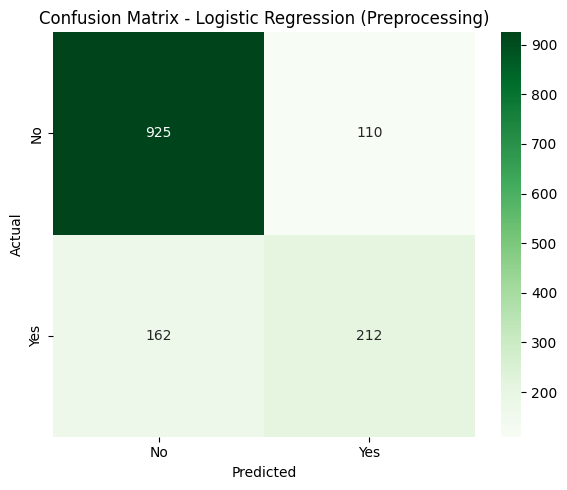


Model: Random Forest
Training model...
Accuracy:  0.7857
Precision: 0.6216
Recall:    0.4920
F1-Score:  0.5493
Confusion Matrix:
[[923 112]
 [190 184]]


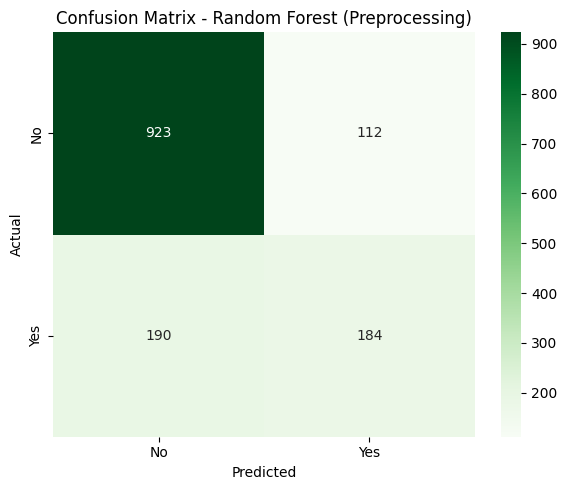


Model: Voting Classifier
Training model...
Accuracy:  0.7842
Precision: 0.6167
Recall:    0.4947
F1-Score:  0.5490
Confusion Matrix:
[[920 115]
 [189 185]]


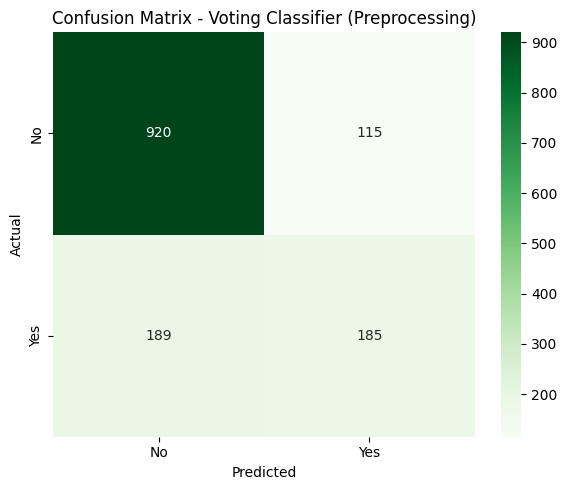


SUMMARY HASIL MODELING DENGAN PREPROCESSING
                     accuracy precision    recall  f1_score
Logistic Regression  0.806955  0.658385  0.566845  0.609195
Random Forest        0.785664  0.621622  0.491979  0.549254
Voting Classifier    0.784244  0.616667  0.494652  0.548961


In [19]:
#Training dan Evaluasi

results_prep = {}

for name, model in models_prep.items():
    print(f"\n{'=' * 60}")
    print(f"Model: {name}")
    print('=' * 60)

    # Training
    print("Training model...")
    model.fit(X_train_prep_scaled, y_train_prep)

    # Prediksi
    y_pred = model.predict(X_test_prep_scaled)

    # Evaluasi
    accuracy = accuracy_score(y_test_prep, y_pred)
    precision = precision_score(y_test_prep, y_pred, pos_label='Yes')
    recall = recall_score(y_test_prep, y_pred, pos_label='Yes')
    f1 = f1_score(y_test_prep, y_pred, pos_label='Yes')
    cm = confusion_matrix(y_test_prep, y_pred)

    # Simpan hasil
    results_prep[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'model': model
    }

    # Print hasil
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {name} (Preprocessing)')
    plt.tight_layout()
    plt.savefig(f'cm_prep_{name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

#Summary hasil
print("\n" + "=" * 80)
print("SUMMARY HASIL MODELING DENGAN PREPROCESSING")
print("=" * 80)
summary_df_prep = pd.DataFrame(results_prep).T[['accuracy', 'precision', 'recall', 'f1_score']]
print(summary_df_prep)

Training model dengan data yang sudah dipreprocess,
Evaluasi menggunakan metrik yang sama untuk perbandingan

**HYPERPARAMETER TUNING**

Optimasi hyperparameter untuk meningkatkan performa model,
Menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik.

In [20]:
#Mendefinisikan Parameter Grids

#Parameter grid untuk Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

#Parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Parameter grid untuk Voting Classifier (tuning individual models)
param_grid_voting = {
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'knn__n_neighbors': [3, 5, 7]
}

Mendefinisikan ruang pencarian hyperparameter untuk setiap model

Parameter ini akan dicoba berbagai kombinasinya untuk menemukan yang terbaik.

**HYPERPARAMETER TUNING UNTUK SETIAP MODEL**

Melakukan GridSearchCV untuk setiap model:
1. Mencoba semua kombinasi parameter
2. Cross-validation untuk validasi
3. Memilih best parameters
4. Training ulang dengan best parameters

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV F1-Score: nan
Test Set Performance:
Accuracy:  0.7970 (79.70%)
Precision: 0.6467 (64.67%)
Recall:    0.5187 (51.87%)
F1-Score:  0.5757 (57.57%)
Confusion Matrix:
[[929 106]
 [180 194]]


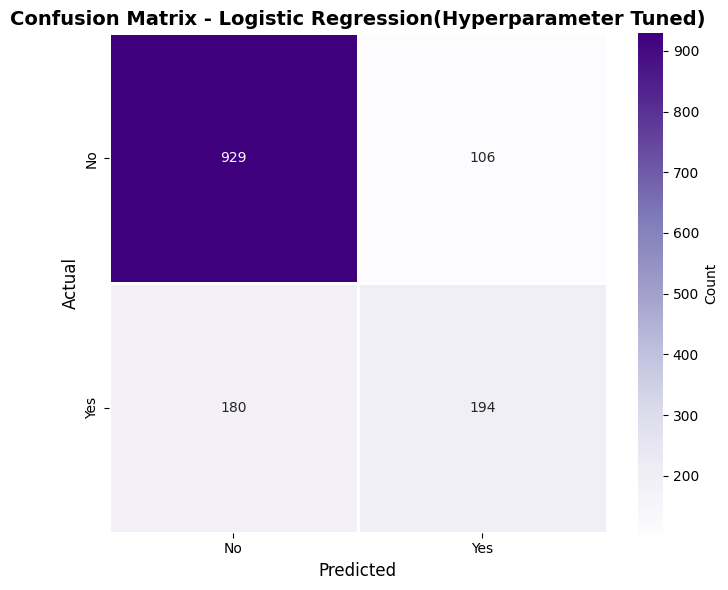

In [27]:
#Tuning Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train_prep_scaled, y_train_prep)

print(f"Best Parameters: {grid_lr.best_params_}")
print(f"Best CV F1-Score: {grid_lr.best_score_:.4f}")

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_prep_scaled)

acc_lr = accuracy_score(y_test_prep, y_pred_lr)
prec_lr = precision_score(y_test_prep, y_pred_lr, pos_label='Yes')
rec_lr = recall_score(y_test_prep, y_pred_lr, pos_label='Yes')
f1_lr = f1_score(y_test_prep, y_pred_lr, pos_label='Yes')
cm_lr = confusion_matrix(y_test_prep, y_pred_lr)

results_tuned = {
    'Logistic Regression': {
        'best_params': grid_lr.best_params_,
        'accuracy': acc_lr,
        'precision': prec_lr,
        'recall': rec_lr,
        'f1_score': f1_lr,
        'confusion_matrix': cm_lr,
        'model': best_lr
    }
}

print(f"Test Set Performance:")
print(f"Accuracy:  {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print(f"Precision: {prec_lr:.4f} ({prec_lr*100:.2f}%)")
print(f"Recall:    {rec_lr:.4f} ({rec_lr*100:.2f}%)")
print(f"F1-Score:  {f1_lr:.4f} ({f1_lr*100:.2f}%)")
print("Confusion Matrix:")
print(cm_lr)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'}, linewidths=1)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title(f'Confusion Matrix - Logistic Regression(Hyperparameter Tuned)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('06_cm_tuned_logistic_regression.png', dpi=300, bbox_inches='tight')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Best CV F1-Score: nan
Test Set Performance:
Accuracy:  0.8027 (80.27%)
Precision: 0.6644 (66.44%)
Recall:    0.5187 (51.87%)
F1-Score:  0.5826 (58.26%)
Confusion Matrix:
[[937  98]
 [180 194]]


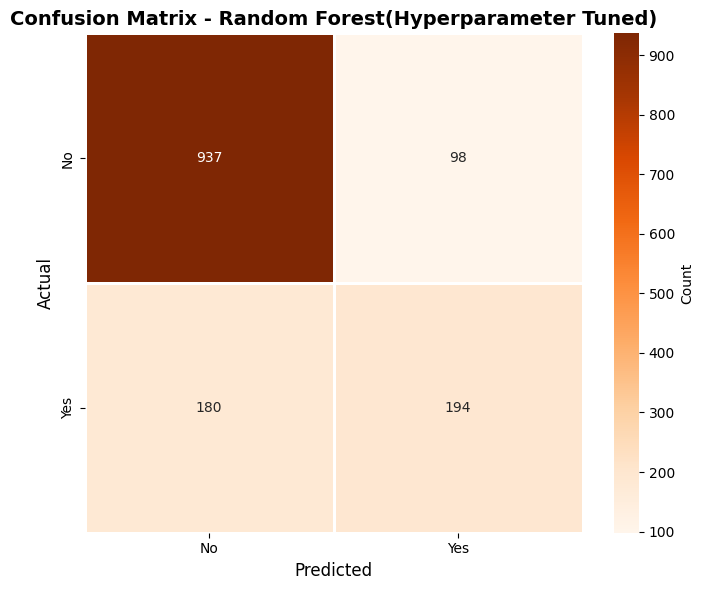

In [28]:
#Tuning Random Forest
grid_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
grid_rf.fit(X_train_prep_scaled, y_train_prep)

print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best CV F1-Score: {grid_rf.best_score_:.4f}")

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_prep_scaled)

acc_rf = accuracy_score(y_test_prep, y_pred_rf)
prec_rf = precision_score(y_test_prep, y_pred_rf, pos_label='Yes')
rec_rf = recall_score(y_test_prep, y_pred_rf, pos_label='Yes')
f1_rf = f1_score(y_test_prep, y_pred_rf, pos_label='Yes')
cm_rf = confusion_matrix(y_test_prep, y_pred_rf)

results_tuned['Random Forest'] = {
    'best_params': grid_rf.best_params_,
    'accuracy': acc_rf,
    'precision': prec_rf,
    'recall': rec_rf,
    'f1_score': f1_rf,
    'confusion_matrix': cm_rf,
    'model': best_rf
}

print(f"Test Set Performance:")
print(f"Accuracy:  {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"Precision: {prec_rf:.4f} ({prec_rf*100:.2f}%)")
print(f"Recall:    {rec_rf:.4f} ({rec_rf*100:.2f}%)")
print(f"F1-Score:  {f1_rf:.4f} ({f1_rf*100:.2f}%)")
print("Confusion Matrix:")
print(cm_rf)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'}, linewidths=1)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title(f'Confusion Matrix - Random Forest(Hyperparameter Tuned)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('07_cm_tuned_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'knn__n_neighbors': 3, 'lr__C': 0.1, 'svm__C': 0.1, 'svm__kernel': 'linear'}
Best CV F1-Score: nan
Test Set Performance:
Accuracy:  0.7786 (77.86%)
Precision: 0.5975 (59.75%)
Recall:    0.5080 (50.80%)
F1-Score:  0.5491 (54.91%)
Confusion Matrix:
[[907 128]
 [184 190]]


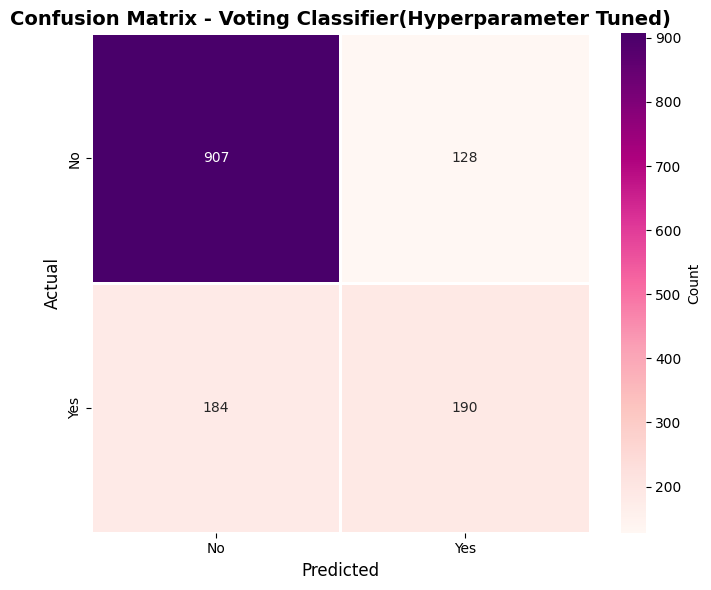

In [30]:
#Tuning Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('svm', SVC(random_state=42, probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

grid_voting = GridSearchCV(
    voting_clf,
    param_grid_voting,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_voting.fit(X_train_prep_scaled, y_train_prep)

print(f"Best Parameters: {grid_voting.best_params_}")
print(f"Best CV F1-Score: {grid_voting.best_score_:.4f}")

best_voting = grid_voting.best_estimator_
y_pred_voting = best_voting.predict(X_test_prep_scaled)

acc_voting = accuracy_score(y_test_prep, y_pred_voting)
prec_voting = precision_score(y_test_prep, y_pred_voting, pos_label='Yes')
rec_voting = recall_score(y_test_prep, y_pred_voting, pos_label='Yes')
f1_voting = f1_score(y_test_prep, y_pred_voting, pos_label='Yes')
cm_voting = confusion_matrix(y_test_prep, y_pred_voting)

results_tuned['Voting Classifier'] = {
    'best_params': grid_voting.best_params_,
    'accuracy': acc_voting,
    'precision': prec_voting,
    'recall': rec_voting,
    'f1_score': f1_voting,
    'confusion_matrix': cm_voting,
    'model': best_voting
}

print(f"Test Set Performance:")
print(f"Accuracy:  {acc_voting:.4f} ({acc_voting*100:.2f}%)")
print(f"Precision: {prec_voting:.4f} ({prec_voting*100:.2f}%)")
print(f"Recall:    {rec_voting:.4f} ({rec_voting*100:.2f}%)")
print(f"F1-Score:  {f1_voting:.4f} ({f1_voting*100:.2f}%)")
print("Confusion Matrix:")
print(cm_voting)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
            cbar_kws={'label': 'Count'}, linewidths=1)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title(f'Confusion Matrix - Voting Classifier(Hyperparameter Tuned)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('08_cm_tuned_voting_classifier.png', dpi=300, bbox_inches='tight')
plt.show()

**SUMMARY TUNING**

Membandingkan hasil dari ketiga model setelah tuning

Mengidentifikasi model terbaik berdasarkan metrik evaluasi

In [31]:
summary_df_tuned = pd.DataFrame(results_tuned).T[['accuracy', 'precision', 'recall', 'f1_score']]
print(summary_df_tuned.round(4))

best_model_name = summary_df_tuned['f1_score'].idxmax()
print(f"MODEL TERBAIK: {best_model_name}")
print(f"F1-Score: {summary_df_tuned.loc[best_model_name, 'f1_score']:.4f}")

                     accuracy precision    recall  f1_score
Logistic Regression  0.797019  0.646667  0.518717  0.575668
Random Forest        0.802697  0.664384  0.518717  0.582583
Voting Classifier    0.778566  0.597484  0.508021  0.549133
MODEL TERBAIK: Random Forest
F1-Score: 0.5826


**PERBANDINGAN SEMUA SKENARIO**

Membandingkan performa model dari ketiga skenario:
1. Direct Modeling
2. Preprocessing
3. Hyperparameter Tuning

              Model      Scenario  Accuracy  Precision   Recall  F1-Score
Logistic Regression        Direct  0.799148   0.640867 0.553476  0.593974
Logistic Regression Preprocessing  0.806955   0.658385 0.566845  0.609195
Logistic Regression         Tuned  0.797019   0.646667 0.518717  0.575668
      Random Forest        Direct  0.792051   0.637288 0.502674  0.562033
      Random Forest Preprocessing  0.785664   0.621622 0.491979  0.549254
      Random Forest         Tuned  0.802697   0.664384 0.518717  0.582583
  Voting Classifier        Direct  0.796309   0.676113 0.446524  0.537842
  Voting Classifier Preprocessing  0.784244   0.616667 0.494652  0.548961
  Voting Classifier         Tuned  0.778566   0.597484 0.508021  0.549133


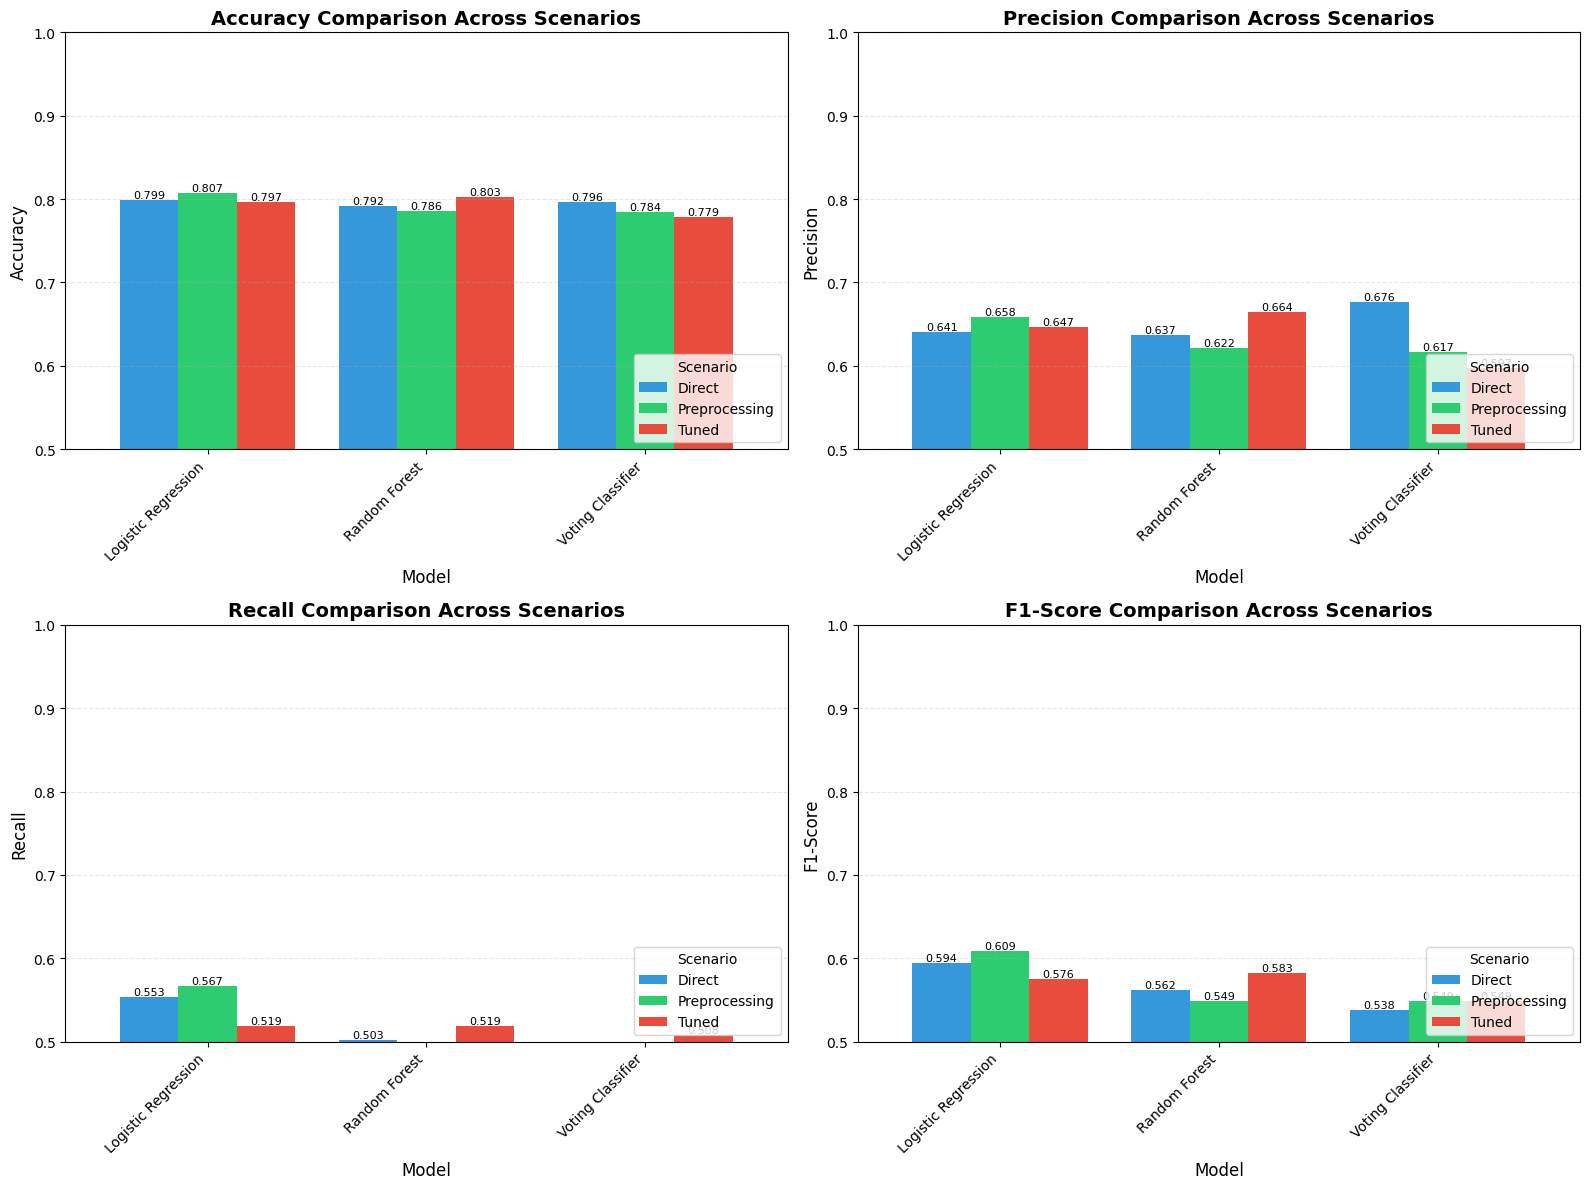

In [32]:
comparison_data = []

for model_name in ['Logistic Regression', 'Random Forest', 'Voting Classifier']:
    #Direct
    comparison_data.append({
        'Model': model_name,
        'Scenario': 'Direct',
        'Accuracy': results_direct[model_name]['accuracy'],
        'Precision': results_direct[model_name]['precision'],
        'Recall': results_direct[model_name]['recall'],
        'F1-Score': results_direct[model_name]['f1_score']
    })

    #Preprocessing
    comparison_data.append({
        'Model': model_name,
        'Scenario': 'Preprocessing',
        'Accuracy': results_prep[model_name]['accuracy'],
        'Precision': results_prep[model_name]['precision'],
        'Recall': results_prep[model_name]['recall'],
        'F1-Score': results_prep[model_name]['f1_score']
    })

    #Tuned
    comparison_data.append({
        'Model': model_name,
        'Scenario': 'Tuned',
        'Accuracy': results_tuned[model_name]['accuracy'],
        'Precision': results_tuned[model_name]['precision'],
        'Recall': results_tuned[model_name]['recall'],
        'F1-Score': results_tuned[model_name]['f1_score']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

#Visualisasi Perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    pivot_data = comparison_df.pivot(index='Model', columns='Scenario', values=metric)
    pivot_data[['Direct', 'Preprocessing', 'Tuned']].plot(
        kind='bar', ax=ax, width=0.8, color=colors
    )

    ax.set_title(f'{metric} Comparison Across Scenarios',
                 fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.legend(title='Scenario', fontsize=10, loc='lower right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0.5, 1.0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    #Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=8)

plt.tight_layout()
plt.savefig('09_comparison_all_scenarios.png', dpi=300, bbox_inches='tight')
plt.show()

**MODEL SELECTION & SAVING**

Memilih model terbaik dan menyimpannya untuk deployment

Model disimpan dalam format .pkl beserta scaler dan informasi lainnya

In [36]:
best_model_name = summary_df_tuned['f1_score'].idxmax()
best_model = results_tuned[best_model_name]['model']

print(f"Model Terbaik: {best_model_name}")
print(f"Performance Metrics:")
print(f"   Accuracy:  {results_tuned[best_model_name]['accuracy']:.4f}")
print(f"   Precision: {results_tuned[best_model_name]['precision']:.4f}")
print(f"   Recall:    {results_tuned[best_model_name]['recall']:.4f}")
print(f"   F1-Score:  {results_tuned[best_model_name]['f1_score']:.4f}")

print("Menyimpan Model dan Preprocessing Objects...")

# Save model
joblib.dump(best_model, 'best_model.pkl')
print("best_model.pkl")

# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("scaler.pkl")

# Save feature names
feature_names = X_train_prep_scaled.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("feature_names.pkl")

# Save categorical columns
joblib.dump(categorical_cols, 'categorical_cols.pkl')
print("categorical_cols.pkl")

# Save model info
model_info = {
    'model_name': best_model_name,
    'best_params': results_tuned[best_model_name]['best_params'],
    'performance': {
        'accuracy': results_tuned[best_model_name]['accuracy'],
        'precision': results_tuned[best_model_name]['precision'],
        'recall': results_tuned[best_model_name]['recall'],
        'f1_score': results_tuned[best_model_name]['f1_score']
    },
    'feature_names': feature_names,
    'categorical_cols': categorical_cols
}
joblib.dump(model_info, 'model_info.pkl')
print("model_info.pkl")

print("SEMUA FILE DEPLOYMENT TELAH DISIMPAN!")
print("File yang siap untuk deployment:")
print("   1. best_model.pkl")
print("   2. scaler.pkl")
print("   3. feature_names.pkl")
print("   4. categorical_cols.pkl")
print("   5. model_info.pkl")

Model Terbaik: Random Forest
Performance Metrics:
   Accuracy:  0.8027
   Precision: 0.6644
   Recall:    0.5187
   F1-Score:  0.5826
Menyimpan Model dan Preprocessing Objects...
best_model.pkl
scaler.pkl
feature_names.pkl
categorical_cols.pkl
model_info.pkl
SEMUA FILE DEPLOYMENT TELAH DISIMPAN!
File yang siap untuk deployment:
   1. best_model.pkl
   2. scaler.pkl
   3. feature_names.pkl
   4. categorical_cols.pkl
   5. model_info.pkl


**FEATURE IMPORTANCE (JIKA RANDOM FOREST)**

Analisis fitur yang paling berpengaruh terhadap prediksi churn

Hanya untuk model tree-based (Random Forest)

Top 20 Most Important Features:
                        Feature  Importance
                         tenure    0.186246
                   TotalCharges    0.166592
                 MonthlyCharges    0.127472
    InternetService_Fiber optic    0.067035
 PaymentMethod_Electronic check    0.057007
              Contract_Two year    0.054726
             OnlineSecurity_Yes    0.035902
              Contract_One year    0.031696
                TechSupport_Yes    0.024079
           PaperlessBilling_Yes    0.022080
                    gender_Male    0.018134
               OnlineBackup_Yes    0.016923
              MultipleLines_Yes    0.016526
                    Partner_Yes    0.014740
TechSupport_No internet service    0.013886
            StreamingMovies_Yes    0.013359
           DeviceProtection_Yes    0.013228
                 Dependents_Yes    0.013194
                  SeniorCitizen    0.012968
                StreamingTV_Yes    0.012890


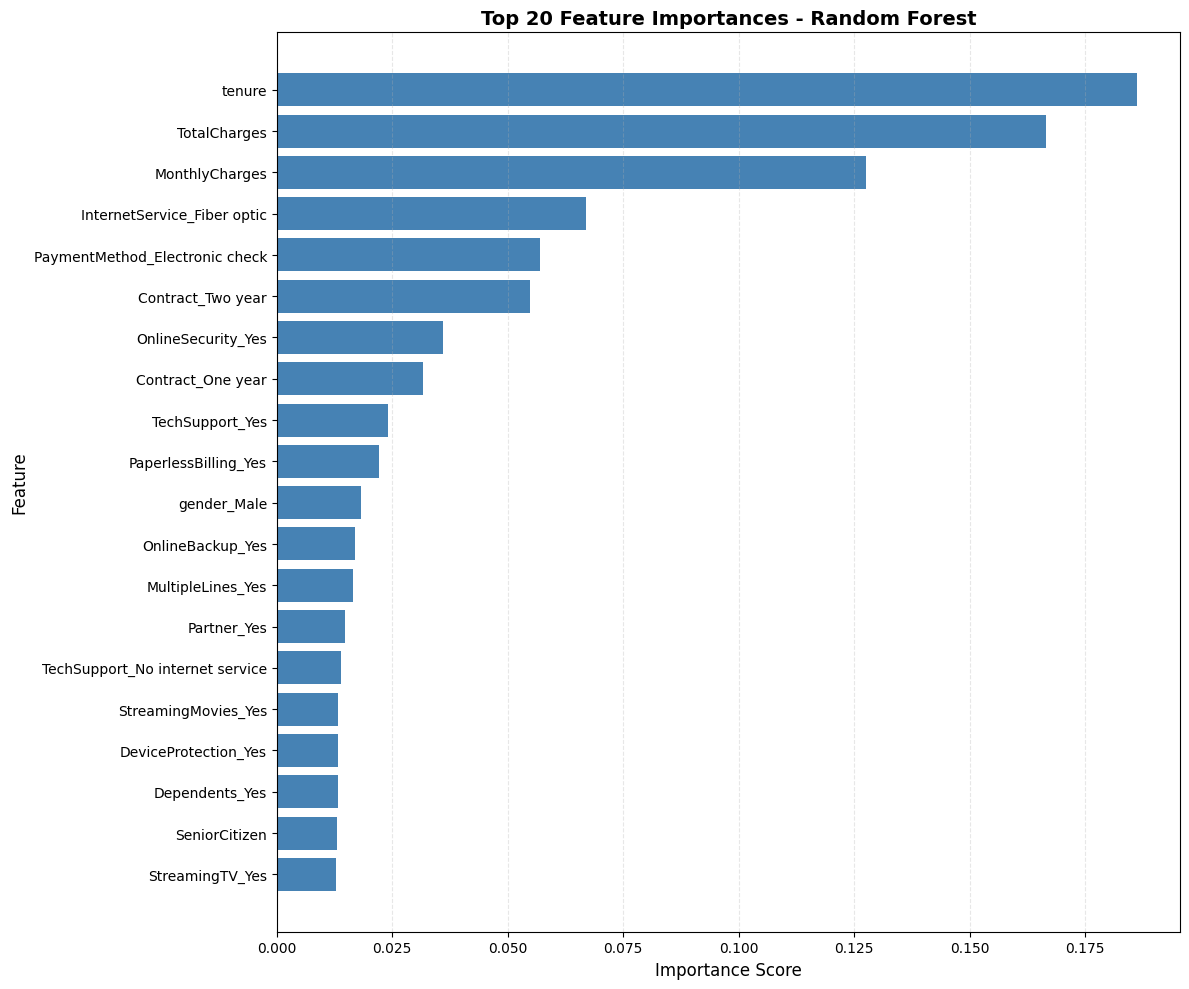

In [37]:
if best_model_name == 'Random Forest':

    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("Top 20 Most Important Features:")
    print(feature_importance_df.head(20).to_string(index=False))

    #Visualisasi
    plt.figure(figsize=(12, 10))
    top_features = feature_importance_df.head(20)

    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Top 20 Feature Importances - Random Forest',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('10_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

In [40]:
from google.colab import files

# Download satu per satu
files.download('best_model.pkl')
files.download('scaler.pkl')
files.download('feature_names.pkl')
files.download('categorical_cols.pkl')
files.download('model_info.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**KESIMPULAN**

DATASET INFORMATION

   • Total Records: {df.shape[0]:,}

   • Total Features: {df.shape[1] - 1}

   • Target Variable: Churn (Yes/No)

   • Class Distribution:

     - No Churn: {(df['Churn'].value_counts()['No'] / len(df) * 100):.1f}%

     - Churn: {(df['Churn'].value_counts()['Yes'] / len(df) * 100):.1f}%

🔄 MODELING SCENARIOS
   1. Direct Modeling: Baseline tanpa preprocessing
   2. With Preprocessing: Data cleaning + feature engineering
   3. Hyperparameter Tuning: Optimasi parameter model

🤖 MODELS IMPLEMENTED
   • Logistic Regression (Konvensional)
   • Random Forest (Ensemble Bagging)
   • Voting Classifier (Ensemble Voting)

🏆 BEST MODEL

   Model: {best_model_name}
   
   Performance Metrics:

   • Accuracy:  {results_tuned[best_model_name]['accuracy']:.4f} ({results_tuned[best_model_name]['accuracy']*100:.2f}%)

   • Precision: {results_tuned[best_model_name]['precision']:.4f} ({results_tuned[best_model_name]['precision']*100:.2f}%)

   • Recall:    {results_tuned[best_model_name]['recall']:.4f} ({results_tuned[best_model_name]['recall']*100:.2f}%)

   • F1-Score:  {results_tuned[best_model_name]['f1_score']:.4f} ({results_tuned[best_model_name]['f1_score']*100:.2f}%)

📁 DEPLOYMENT FILES

   ✅ best_model.pkl

   ✅ scaler.pkl

   ✅ feature_names.pkl

   ✅ categorical_cols.pkl

   ✅ model_info.pkl

📈 KEY INSIGHTS

   • Preprocessing meningkatkan performa model

   • Hyperparameter tuning memberikan hasil optimal
   
   • Model dapat memprediksi churn dengan akurasi tinggi